------------------------------------------
| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Module    | Foundations |
| Notebook  |  Bayes Theorem - Beta-Binomial Distribution|
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 05/29/20 |
-------------------------------------------------

### Notes: 
There are two ways to generate the posterior
- Indirectly, when a tractable form is not available we will use this method
- Directly, 
    - When the functional form is known or 
    - We can simulate directly from the posterior
- This will be for our beta prior and binomial likelihood
- Code for our click through rate example

In [1]:
# Load librarires
import numpy as np
import scipy.stats as sc
import pandas as pd

# Plot configurations
import plotnine as pn
pn.options.figure_size = (15,4)
pn.options.dpi = 125

### Setting up helper functions 

In [2]:
### Setting up prior ###
# Generate a random value from a beta distribution
beta_prior = lambda a,b, size: np.random.beta(a, b, size = size)

### Setting data generating process ###
likelihood = lambda x,n,theta: sc.binom.pmf(k = x, n= n, p = theta)

### Beta probability ###
beta_prob = lambda theta, a, b: sc.beta.pdf(theta,a, b)

### Posterior distribution ###
# Directly generate a sample from the posterior distribution
beta_posterior = lambda a,b,n,x,size: beta_prior(a+x, b+n-x, size)


### Generating the posterior indirectly

In [6]:
### Generating the posterior indirectly ###
# Here we are setting up the constants
delta = 1/1000
a = 5 ; b = 10
X = 15 ; n = 35

# Prior distribution
thetas = np.arange(0,1,delta)
pi_thetas = beta_prob(thetas, a = a, b = b)

# Next we calculate the likelihood
X_given_theta = likelihood(x = X, n = n, theta = thetas)

# And finally the posterior distribution 
normalizing_constant  = np.sum(pi_thetas * X_given_theta)
posterior_distribution  = (X_given_theta * pi_thetas) / normalizing_constant

In [7]:
# Normalizing our densities for the likelihood and prior
density_X_given_theta = X_given_theta/np.sum(X_given_theta)
density_pi_theta = pi_thetas/np.sum(pi_thetas)

# The labels and value sets which will be used in plotting 
labels = ['Prior Distribution (Pr(theta))','Likelihood Density (Pr(X|theta))','Posterior Distribution (Pr(theta|x))']
values = [thetas, density_pi_theta, density_X_given_theta, posterior_distribution]

# .. and turn that into a data frame, lte's take a look
df_posterior = pd.DataFrame(dict(zip(['thetas'] + labels, values)))
df_posterior

,thetas,Prior Distribution (Pr(theta)),Likelihood Density (Pr(X|theta)),Posterior Distribution (Pr(theta|x))
0,0.000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.001,9.920270e-12,1.146095e-37,5.493771e-46
2,0.002,1.573001e-10,3.681050e-33,2.797867e-40
3,0.003,7.891790e-10,1.579912e-30,6.024692e-37
4,0.004,2.471770e-09,1.158771e-28,1.383987e-34
...,...,...,...,...
995,0.995,1.916269e-20,1.034325e-38,9.577234e-56
996,0.996,2.582328e-21,1.210600e-40,1.510562e-58
997,0.997,1.946731e-22,3.897296e-43,3.666028e-62
998,0.998,5.084242e-24,1.189786e-46,2.922951e-67


In [8]:
# Re-formatting the data for plotting
df_posterior = df_posterior.set_index('thetas').stack().reset_index().rename({'level_1':'Distributions',0:'Values'},axis = 1)
df_posterior

,thetas,Distributions,Values
0,0.000,Prior Distribution (Pr(theta)),0.000000e+00
1,0.000,Likelihood Density (Pr(X|theta)),0.000000e+00
2,0.000,Posterior Distribution (Pr(theta|x)),0.000000e+00
3,0.001,Prior Distribution (Pr(theta)),9.920270e-12
4,0.001,Likelihood Density (Pr(X|theta)),1.146095e-37
...,...,...,...
2995,0.998,Likelihood Density (Pr(X|theta)),1.189786e-46
2996,0.998,Posterior Distribution (Pr(theta|x)),2.922951e-67
2997,0.999,Prior Distribution (Pr(theta)),9.970020e-27
2998,0.999,Likelihood Density (Pr(X|theta)),1.151843e-52


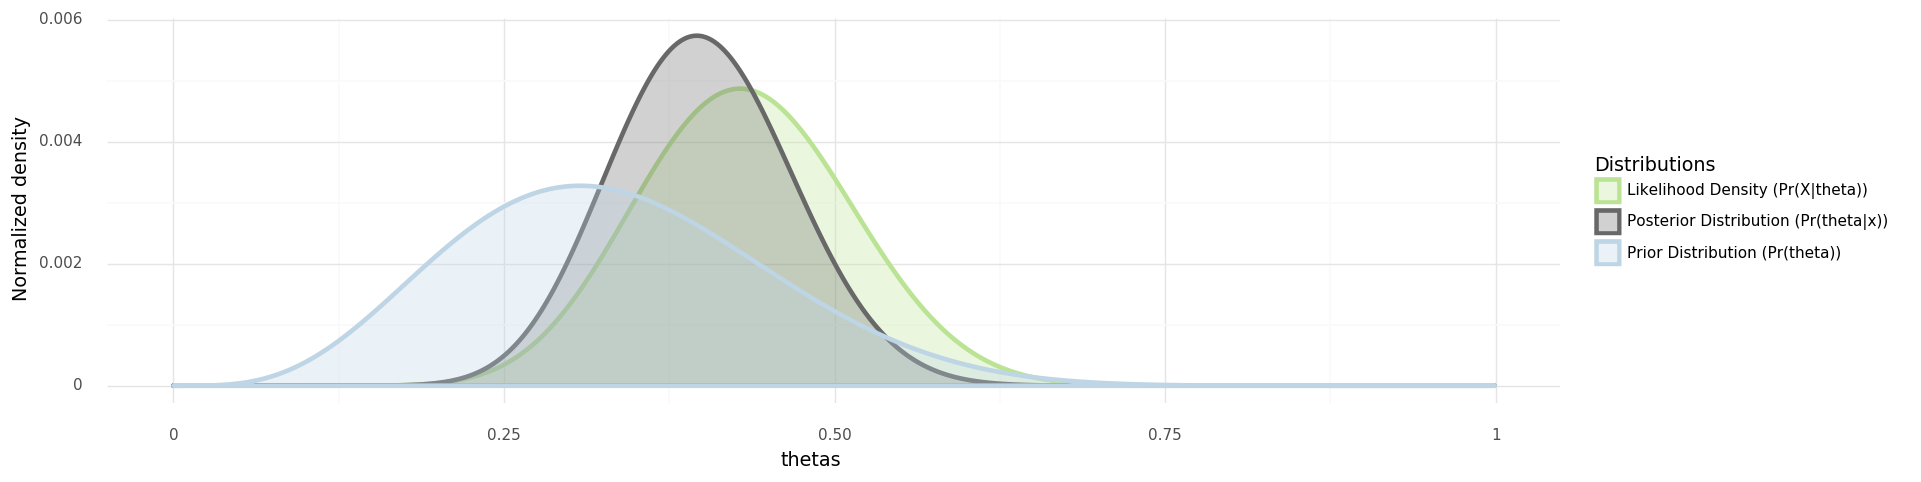

<ggplot: (319051584)>

In [9]:
# Plot the prior, posterior and likelihood
colors = ['#BED5E5','#BAE393','#686868']
pn.ggplot(pn.aes(x = 'thetas', y = 'Values', color = 'Distributions', fill = 'Distributions'), data = df_posterior)\
+ pn.geom_area(size = 1.5, alpha = 0.3, position = 'identity')\
+ pn.scale_color_manual(dict(zip(labels,colors)))\
+ pn.scale_fill_manual(dict(zip(labels,colors)))\
+ pn.ylab('Normalized density')\
+ pn.theme_minimal()


### Generating the posterior directly

In [11]:
### Directly Generating the Posterior ###
thetas_in = np.arange(0,1,delta)

# Direct method simulating from the posterior (if the distribution is unknown)
posterior_direct_simulation = beta_posterior(a = a, b = b, n = 35, x = 15, size = int(1/delta))

# Direct method using the pdf/pmf of the posterior
posterior_direct_pdf = beta_prob(thetas_in , a = a + X, b = b + n - X)

# Dataframe to compare results
df_posterior_direct = pd.DataFrame({'thetas':thetas_in,
                                    'posterior_direct_simulation':posterior_direct_simulation,
                                    'posterior_direct_pdf':posterior_direct_pdf})

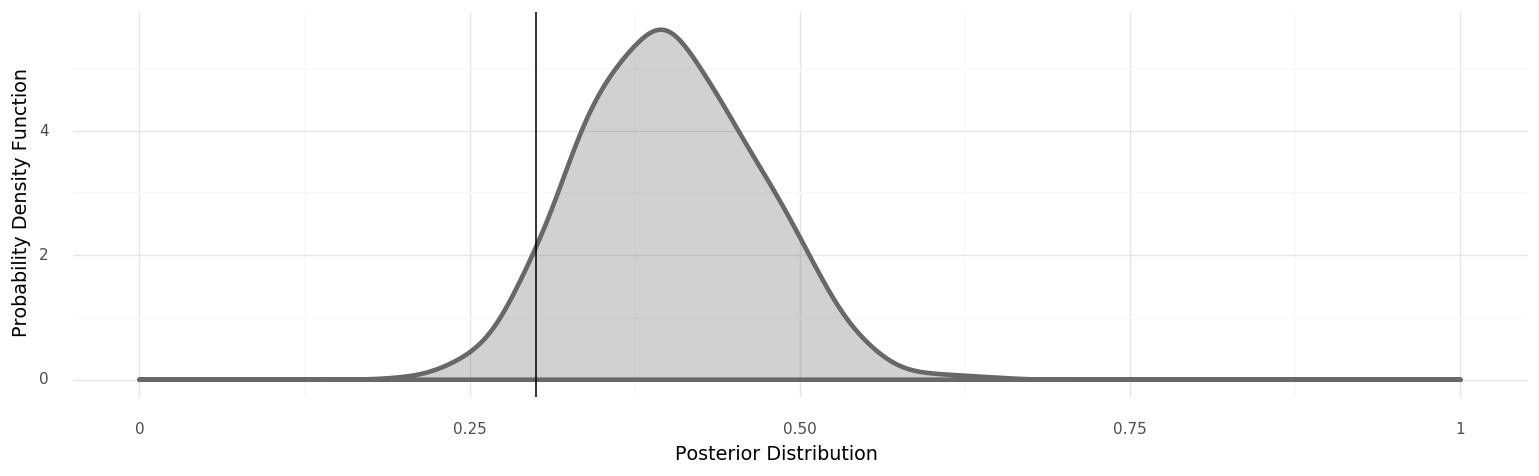

<ggplot: (319071962)>

In [12]:
### Plot the prior, posterior and likelihood ###

# Using simulations
pn.ggplot(data = df_posterior_direct)\
+ pn.geom_density(pn.aes('posterior_direct_simulation'), alpha = 0.3, fill = '#686868', color = '#686868', size = 1.5)\
+ pn.geom_vline(pn.aes(xintercept = 0.3))\
+ pn.xlim(0,1)\
+ pn.xlab('Posterior Distribution')\
+ pn.ylab('Probability Density Function')\
+ pn.theme_minimal()


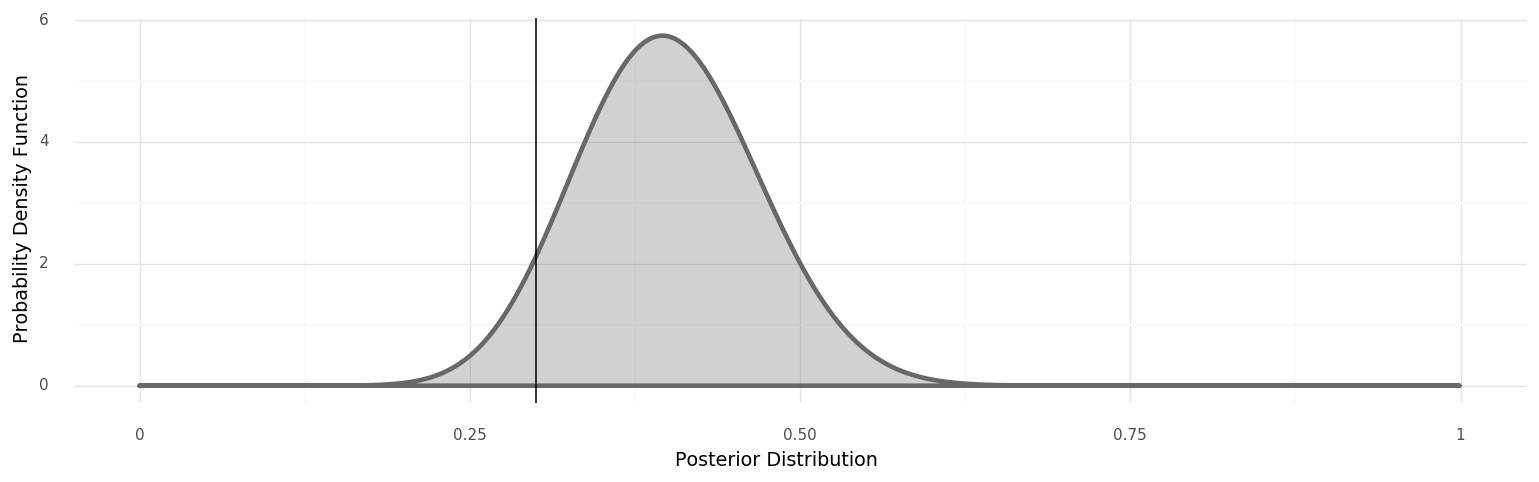

<ggplot: (321238704)>

In [13]:
# Using the pdf
pn.ggplot(data = df_posterior_direct)\
+ pn.geom_area(pn.aes(x ='thetas', y = 'posterior_direct_pdf'), alpha = 0.3, fill = '#686868', color = '#686868', size = 1.5)\
+ pn.geom_vline(pn.aes(xintercept = 0.3))\
+ pn.xlim(0,1)\
+ pn.xlab('Posterior Distribution')\
+ pn.ylab('Probability Density Function')\
+ pn.theme_minimal()